In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.datasets import load_iris

##  【問題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。  
irisデータセットを取得した後、データフレームからこれらを抜き出してください。
- vergicolorとvirginica
- sepal_lengthとpetal_length

In [2]:
#データの取得
data = load_iris()

In [3]:
X = pd.DataFrame(data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.Series(data.target, name='Species')

In [4]:
df = pd.concat([X, y], axis=1)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#Speiciesの値と名前の対応付
name = pd.DataFrame({'Species': [0, 1, 2], 'Species_name': ['setosa', 'versicolor', 'virginica']})
name

,Species,Species_name
0,0,setosa
1,1,versicolor
2,2,virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
#dfから目的変数の値がvergicolor, virginicaのデータで、説明変数sepal_length, petal_length列を抽出
df = df.loc[df.Species.isin([1, 2]), ['sepal_length', 'petal_length','Species']]
df.shape

(100, 3)

In [9]:
#Speice_name列の追加
df = pd.merge(df, name, on='Species', how='inner')

In [10]:
df.head()

,sepal_length,petal_length,Species,Species_name
0,7.0,4.7,1,versicolor
1,6.4,4.5,1,versicolor
2,6.9,4.9,1,versicolor
3,5.5,4.0,1,versicolor
4,6.5,4.6,1,versicolor


##  【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。  
その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。  
sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。  
ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


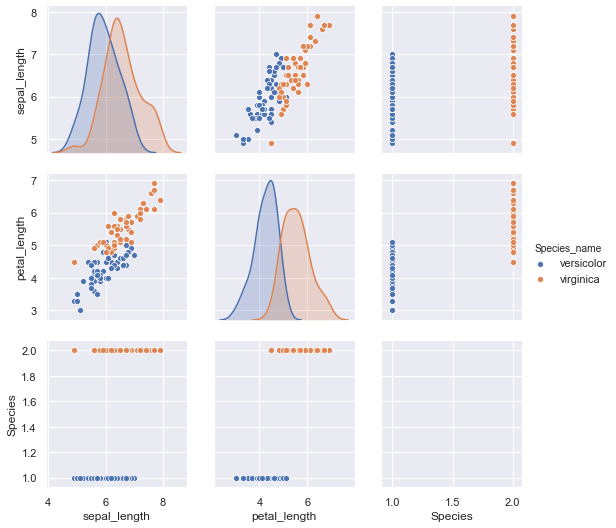

In [11]:
#データのdistribution plot, scatter plotを表示
sns.pairplot(df, hue='Species_name');

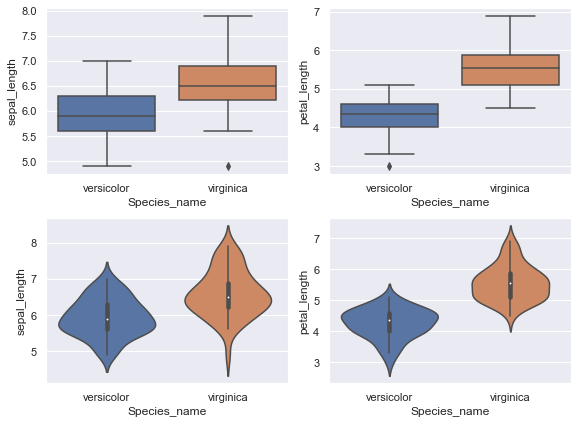

In [12]:
#データのbox plot, violin plotを表示
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
for i, feat in enumerate(['sepal_length', 'petal_length']):
    sns.boxplot(x='Species_name', y=feat, data=df, ax=axes[0][i])
    sns.violinplot(x='Species_name', y=feat, data=df, ax=axes[1][i])
plt.tight_layout()
plt.show();

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix

In [14]:
X = df[['sepal_length', 'petal_length']].values
y = df['Species'].values

##  【問題3】前処理・学習用データと検証用データの分割
前処理の一貫として、学習用（train）データと検証用（validation）データの分割を行います。  
今回は学習用データ75%、検証用データ25%として分割してください。  
scikit-learnのtrain_test_splitが利用できます。

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

##  【問題4】前処理・標準化
分類精度をあげるための加工を行います。  
手法ごとに適切な方法は異なりますが、ここでは一例として標準化を行うことにします。  
sklearn.preprocessing.StandardScalerを使って標準化してください。

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train, copy=True)
X_test_scaled = scaler.transform(X_test, copy=True)

##  【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。  
scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは学習用データです。
学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。   
最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。  
デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。
<br>
##  【問題6】評価
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。  
2値分類を評価するための指標値には accuracy、precision、recall、f値 があります。  
scikit-learnに用意されていますので、それぞれを計算してください。  
また、それぞれの意味について簡単に調査してマークダウンでまとめてください。  
標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。  
precision、recall、f値を計算する背景にはTrue Positive、True Negative、False Positive、False Negativeがあります。  
この4種類を計算し表示するものとして混合行列があります。これもscikit-learnを使い表示させてください。

In [17]:
result = pd.DataFrame(np.zeros((6, 4)), 
                      index=['1-nn', '1-nn(scaled)', '3-nn', '3-nn(scaled)', '5-nn', '5-nn(scaled)'], 
                      columns=['accuracy', 'precision', 'recall', 'f_value'])
knn_dict = {}

In [18]:
#問題4, 5
#n_neighbors = [1, 3, 5]について
for nn in [1, 3, 5]:
    #without scaling
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    result.loc[str(nn)+'-nn'] = [accuracy(y_test, y_pred), precision(y_test, y_pred), 
                                 recall(y_test, y_pred), f1(y_test, y_pred)]
    knn_dict[str(nn)] = knn
    print(str(nn)+'-nn')
    print("confusion_matrix (without scaling) = \n{}".format(confusion_matrix(y_test, y_pred)))
    
    #with scaling
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    result.loc[str(nn)+'-nn(scaled)'] = [accuracy(y_test, y_pred), precision(y_test, y_pred), 
                                         recall(y_test, y_pred), f1(y_test, y_pred)]
    knn_dict[str(nn)+'scaled'] = knn

    print("confusion_matrix (with scaling) = \n{}".format(confusion_matrix(y_test, y_pred)))
    print('*'*30)

1-nn
confusion_matrix (without scaling) = 
[[ 9  1]
 [ 1 14]]
confusion_matrix (with scaling) = 
[[ 9  1]
 [ 1 14]]
******************************
3-nn
confusion_matrix (without scaling) = 
[[ 9  1]
 [ 0 15]]
confusion_matrix (with scaling) = 
[[ 9  1]
 [ 0 15]]
******************************
5-nn
confusion_matrix (without scaling) = 
[[ 9  1]
 [ 0 15]]
confusion_matrix (with scaling) = 
[[ 9  1]
 [ 0 15]]
******************************


In [19]:
#accuracy, precision, recall f_valueの結果
result.round(3)

,accuracy,precision,recall,f_value
1-nn,0.92,0.9,0.9,0.900
1-nn(scaled),0.92,0.9,0.9,0.900
3-nn,0.96,1.0,0.9,0.947
3-nn(scaled),0.96,1.0,0.9,0.947
5-nn,0.96,1.0,0.9,0.947
5-nn(scaled),0.96,1.0,0.9,0.947


二値分類の推定結果は、推定値と正解値から以下の4種類に分類される。  
True Positive  (TP): 正解値1, 推定値1  
True Negative  (TN): 正解値0, 推定値0  
Flase Positive (FP): 正解値0, 推定値1  
False Negative (FN): 正解値1, 推定値0  

- Accuracy  
推定結果全体の精度  
$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $

- Precision  
推定値を正と判断した中で、正解値が正である比率。  
分類器が正解値負のものを正と推定しない能力。  
$ Precision = \frac{TP}{TP + FP} $

- Recall  
正解値が正であるものの中で、推定値が正と判断した比率。  
分類器が正解値正のものをみつける能力。
$ Precision = \frac{TP}{TP + FN} $

- F value  
PrecisionとRecallの調和平均の値。  
$ Precision = \frac{2 \times Precision \times Recall}{Precision + Recall} $

##  【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。  
どう分割するかという 決定領域 を描く関数を用意しました。  
これを利用して可視化を行ってください。可能であればより見やすく改良も行いましょう。

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), 
                                    np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [21]:
def decision_region3(X_train, y_train, model, step=0.01, title='decision region', 
                    xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 3)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['lightgreen', 'pink', 'skyblue']
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), 
                                    np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1],
                    s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

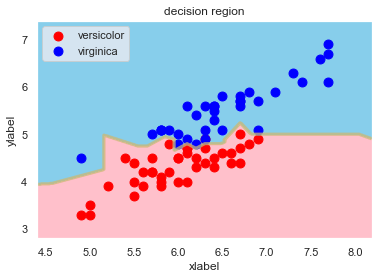

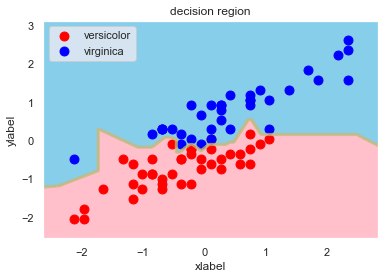

In [22]:
#n_neighbors = 1
decision_region(X_train, y_train, knn_dict['1'])
decision_region(X_train_scaled, y_train, knn_dict['1scaled'])

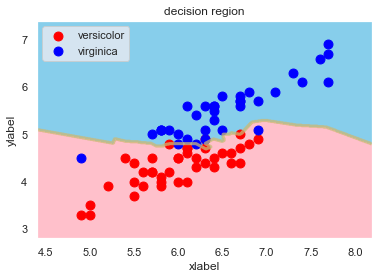

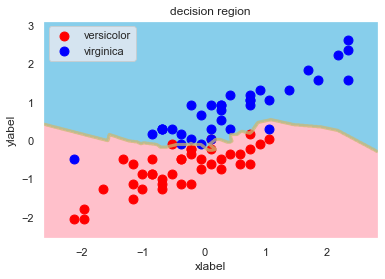

In [23]:
#n_neighbors = 3
decision_region(X_train, y_train, knn_dict['3'])
decision_region(X_train_scaled, y_train, knn_dict['3scaled'])

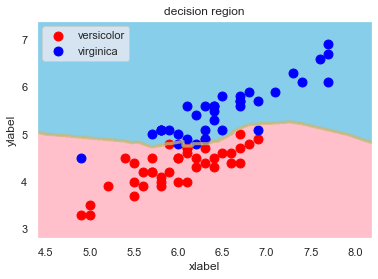

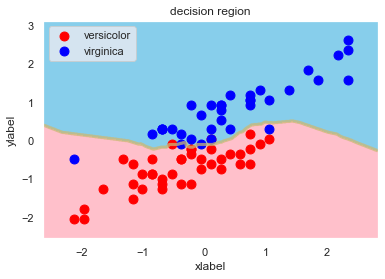

In [24]:
#n_neighbors = 5
decision_region(X_train, y_train, knn_dict['5'])
decision_region(X_train_scaled, y_train, knn_dict['5scaled'])

## 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。  
そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。  
どの手法がどの指標値が良かったかや、どういった決定領域になっていたかを述べてください。
- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト
<br>

## 【問題9】各パラメータの意味・標準化の有無の比較
手法のパラメータはデフォルトとしましたが、実際に利用する上ではデフォルトは必ずしも良い設定ではありません。  
それぞれの意味を調査した上で複数の設定を試し、その結果を報告してください。  
<br>
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。  
各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。  
考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

In [25]:
from sklearn.model_selection import GridSearchCV

### k-Nearest Neighbors
**パラメータ**  
n-neighbors: 近傍点の数 (int, default=5)   
weights: 重みパラメータ (str or callable, default='uniform')  
algorithem: 近傍点の探索アルゴリズム (\['auto', 'ball_tree', 'kd_tree', 'brute'\], optional)  

In [26]:
#use scaled X
parameters = {'n_neighbors': (1, 3, 5, 7, 9),
              'weights': ('uniform', 'distance'),
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')
             }
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=5, verbose=1)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': (1, 3, 5, 7, 9),
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [27]:
best_knn = clf.best_estimator_
best_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [28]:
y_pred = best_knn.predict(X_test_scaled)
accuracy(y_test, y_pred)

0.96

### Logistic Regression
**パラメータ**  
penalty: 損失関数に加えるペナルティ (str, \['l1', 'l2', 'elasticnet', 'none'\], optional, default='none')   
C: 逆正則化パラメータ (float, optional, default=1.0)  
fit_intercept: 切片を考慮するか (bool, optional, default=False)  
l1_ratio: 損失関数のペナルティ項のl1比率 (float or None, optional, default=None)

In [29]:
from sklearn.linear_model import LogisticRegression
params = {'penalty': ['elasticnet', 'none'],
          'solver': ['saga',],
          'C': [0.01, 0.1, 1, 100],
          'fit_intercept': [True, False],
          'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1.0]
         }
lr = LogisticRegression()
clf = GridSearchCV(lr, params, cv=5, verbose=1)
clf.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packa

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packa

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/skl

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty))
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 100],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1.0],
                         'penalty': ['elasticnet', 'none'],
                         'solver': ['saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [30]:
best_lr = clf.best_estimator_
best_lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=0, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = best_lr.predict(X_test_scaled)
accuracy(y_test, y_pred)

0.96

### SVM
**パラメータ**  
C: 正則化パラメータ (float, optional, default=1.0)  
kernel: カーネル関数 (str, \['rbf', 'linear', 'poly', 'sigmoid', 'precomputed'\] or callable, optinal, default='rbf')  
gamma: カーネル係数 (\['scale', 'auto'\] or float, optional, default='scale')  

In [32]:
from sklearn.svm import SVC

In [33]:
params = {'C': [0.1, 1, 10, 50, 100],
          'kernel': ['rbf', 'sigmoid'],
          'gamma': [0.001, 0.003, 0.1, 0.3, 1]
         }
svc = SVC()
clf = GridSearchCV(svc, params, cv=5, verbose=1)
clf.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'gamma': [0.001, 0.003, 0.1, 0.3, 1],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [34]:
best_svc = clf.best_estimator_
best_svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
y_pred = best_svc.predict(X_test_scaled)
accuracy(y_pred, y_test)

0.96

### Decision Tree Classifier
**パラメータ**  
max_depth: 木の最大深さ (int, default=None)  
min_samples_split: nodeでの分割に必要な最低サンプル数 (int or float, default=2)  
min_samples_leaf: 葉に必要な最低サンプル数 (int or float, default=1)  
max_features: splitに使用する特徴量の最大数 (int, float or \{'auto', 'sqrt', 'log2'\}, default=None)  
max_leaf_node: 葉の最大数 (int, default=None)  

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
params = {'max_depth': [3, 5, 10],
          'min_samples_split': [2, 5, 8],
          'min_samples_leaf': [1, 3, 5]
         }
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, params, cv=5, verbose=1)
clf.fit(X_train_scaled, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.1s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 8]

In [38]:
best_tree = clf.best_estimator_
best_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
y_pred = best_tree.predict(X_test_scaled)
accuracy(y_pred, y_test)

0.96

### RamdomForest Classifier
**パラメータ**  
n_estimators: 木の数 (int, default=100)  
bootstap: ブートストラップ法でサンプリングを行うかどうか (bool, optional, default=True)  
oob_score: oobによる汎化誤差の推定 (bool, default=False)  
max_depth: 木の最大深さ (int, default=None)  
min_samples_split: nodeでの分割に必要な最低サンプル数 (int or float, default=2)  
min_samples_leaf: 葉に必要な最低サンプル数 (int or float, default=1)  
max_features: splitに使用する特徴量の最大数 (int, float or \{'auto', 'sqrt', 'log2'\}, default=None)  
max_leaf_node: 葉の最大数 (int, default=None)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
params = {'n_estimators': [10, 50, 100],
          'bootstrap': [True, False],
          'oob_score': [False],
          'max_depth': [3, 5, 10],
          'min_samples_split': [2, 5, 8],
          'min_samples_leaf': [1, 3, 5]
         }
forest = RandomForestClassifier()
clf = GridSearchCV(forest, params, cv=5, verbose=1)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:   53.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [42]:
best_forest = clf.best_estimator_
best_forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_pred = best_forest.predict(X_test_scaled)
accuracy(y_pred, y_test)

0.96

#### 標準化ありなしの比較

In [44]:
result_method = pd.DataFrame(np.zeros((10, 4)), 
                      index=['k-Nearest Neigbor (n=5)', 'k-Nearest Neigbor (n=5, scaled)',
                             'Logistic Regression', 'Logistic Regression (scaled)',
                             'SVM', 'SVM (scaled)',
                             'Decision Tree', 'Decision Tree (scaled)',
                             'Random Forest', 'Random Forest (scaled)'], 
                      columns=['accuracy', 'precision', 'recall', 'f_value'])

#KNN
result_method.loc['k-Nearest Neigbor (n=5)'] = result.loc['5-nn']
result_method.loc['k-Nearest Neigbor (n=5, scaled)'] = result.loc['5-nn(scaled)']

In [45]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

#without scaling
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
result_method.loc['Logistic Regression'] = [accuracy(y_test, y_pred), precision(y_test, y_pred), 
                                            recall(y_test, y_pred), f1(y_test, y_pred)]


#with scaling
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred = lr_scaled.predict(X_test_scaled)
result_method.loc['Logistic Regression (scaled)'] = [accuracy(y_test, y_pred), precision(y_test, y_pred), 
                                                     recall(y_test, y_pred), f1(y_test, y_pred)]

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


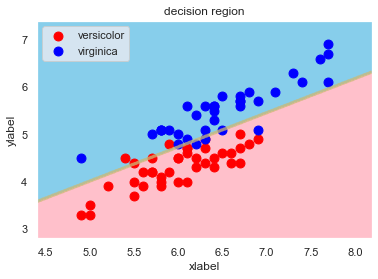

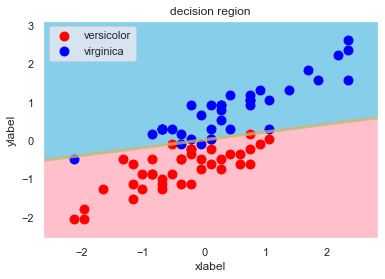

In [46]:
decision_region(X_train, y_train, lr)
decision_region(X_train_scaled, y_train, lr_scaled)

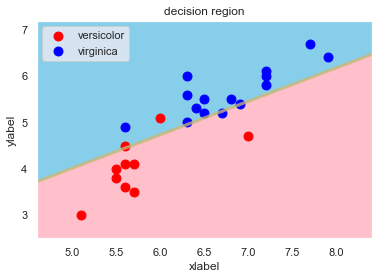

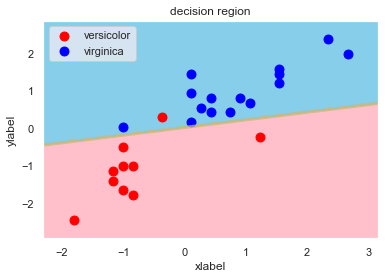

In [47]:
decision_region(X_test, y_test, lr)
decision_region(X_test_scaled, y_test, lr_scaled)

In [48]:
#SVM
from sklearn.svm import SVC

#without scaling
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
result_method.loc['SVM'] = [accuracy(y_test, y_pred), precision(y_test, y_pred), 
                            recall(y_test, y_pred), f1(y_test, y_pred)]
  
#with scaling
svc_scaled = SVC()
svc_scaled.fit(X_train_scaled, y_train)
y_pred = svc_scaled.predict(X_test_scaled)
result_method.loc['SVM (scaled)'] = [accuracy(y_test, y_pred), precision(y_test, y_pred), 
                                     recall(y_test, y_pred), f1(y_test, y_pred)]

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


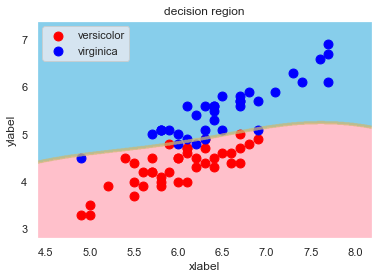

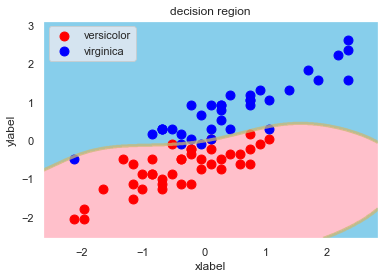

In [49]:
decision_region(X_train, y_train, svc)
decision_region(X_train_scaled, y_train, svc_scaled)

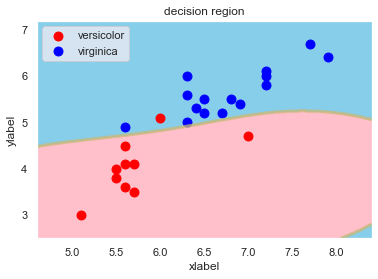

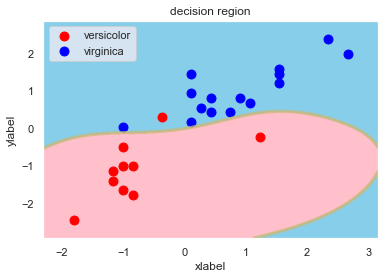

In [50]:
decision_region(X_test, y_test, svc)
decision_region(X_test_scaled, y_test, svc_scaled)

In [51]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#without scaling
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
result_method.loc['Decision Tree'] = [accuracy(y_test, y_pred), precision(y_test, y_pred), 
                                      recall(y_test, y_pred), f1(y_test, y_pred)]


#with scaling
tree_scaled = DecisionTreeClassifier()
tree_scaled.fit(X_train_scaled, y_train)
y_pred = tree_scaled.predict(X_test_scaled)
result_method.loc['Decision Tree (scaled)'] = [accuracy(y_test, y_pred), precision(y_test, y_pred), 
                                               recall(y_test, y_pred), f1(y_test, y_pred)]

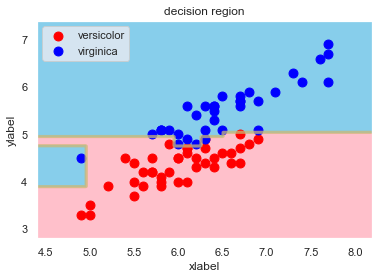

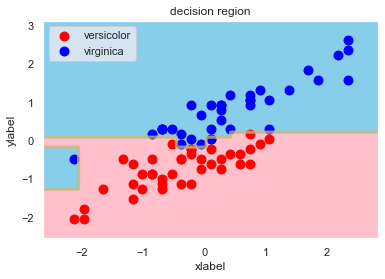

In [52]:
decision_region(X_train, y_train, tree)
decision_region(X_train_scaled, y_train, tree_scaled)

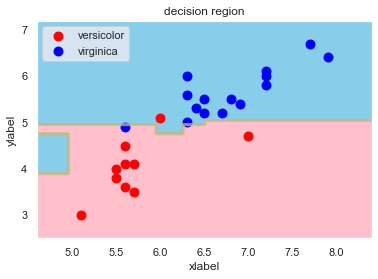

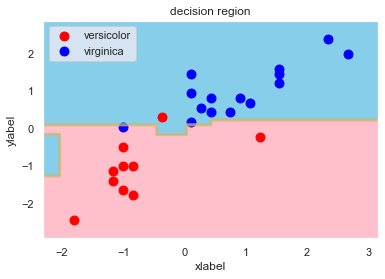

In [53]:
decision_region(X_test, y_test, tree)
decision_region(X_test_scaled, y_test, tree_scaled)

In [54]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#without scaling
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
result_method.loc['Random Forest'] = [accuracy(y_test, y_pred), precision(y_test, y_pred), 
                                      recall(y_test, y_pred), f1(y_test, y_pred)]


#with scaling
forest_scaled = RandomForestClassifier()
forest_scaled.fit(X_train_scaled, y_train)
y_pred = forest_scaled.predict(X_test_scaled)
result_method.loc['Random Forest (scaled)'] = [accuracy(y_test, y_pred), precision(y_test, y_pred), 
                                               recall(y_test, y_pred), f1(y_test, y_pred)]

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


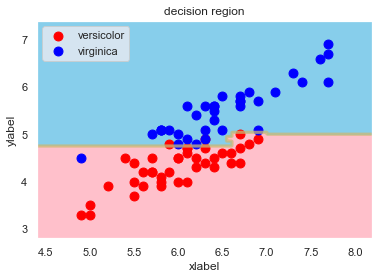

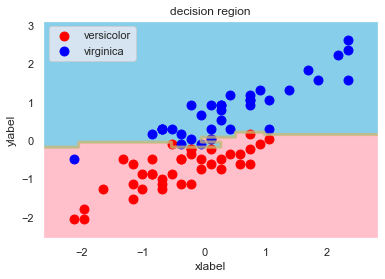

In [55]:
decision_region(X_train, y_train, forest)
decision_region(X_train_scaled, y_train, forest_scaled)

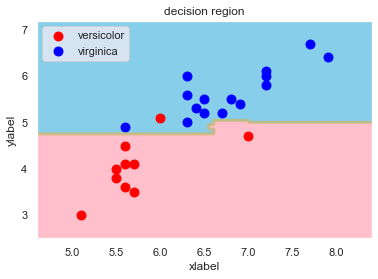

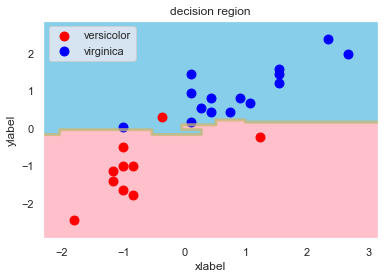

In [56]:
decision_region(X_test, y_test, forest)
decision_region(X_test_scaled, y_test, forest_scaled)

In [57]:
result_method.round(3)

,accuracy,precision,recall,f_value
k-Nearest Neigbor (n=5),0.96,1.000,0.9,0.947
"k-Nearest Neigbor (n=5, scaled)",0.96,1.000,0.9,0.947
Logistic Regression,0.88,0.889,0.8,0.842
Logistic Regression (scaled),0.96,1.000,0.9,0.947
SVM,0.96,1.000,0.9,0.947
SVM (scaled),0.96,1.000,0.9,0.947
Decision Tree,0.92,0.900,0.9,0.900
Decision Tree (scaled),0.92,0.900,0.9,0.900
Random Forest,0.96,1.000,0.9,0.947
Random Forest (scaled),0.96,1.000,0.9,0.947


## 【問題10】全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。  
学習と推定、評価を行って、最も精度の高い手法を探してください。  
ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは意識せず動作させることができます。  
しかし、指標値precision、recall、f値はライブラリのパラメータをデフォルトから変更する必要があります。  
マイクロ平均やマクロ平均という考え方を使いますので、これについて調査して説明をまとめましょう。  
また、決定領域を可視化する場合は前述の関数を適切に書き換える必要があります。以下が出力例です。

In [58]:
#データの取得
data = load_iris()
X = pd.DataFrame(data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.Series(data.target, name='Species')
df = pd.concat([X, y], axis=1)
df = df[['sepal_length', 'petal_length','Species']]
df.shape

(150, 3)

In [59]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [60]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

/Users/nambayasumasa/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


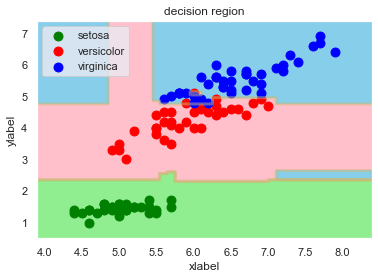

In [61]:
decision_region3(X_train, y_train, forest)